# Examples of how to use PCI Package

PCI python module available on [Gibhub](https://github.com/muryelgp/PCI).

## Basic Functions

In [50]:
from pci import AsymmetricMeasurment as asyme
import numpy as np

Defining asyme objects

v = asyme(value, err_m, err_p, confidence)

In [55]:
a = asyme(10, 1, 0.5, confidence = 68)
b = asyme(20, 2 ,3, confidence = 68)

In [52]:
print(a)

Value = 1.00e+01 ( - 1.00e+00 , + 5.00e-01 )
(68% confidence interval)


In [57]:
print(b)

Value = 2.00e+01 ( - 2.00e+00 , + 3.00e+00 )
(68% confidence interval)


Five basics operations can be done directly between the objects 

(+, -, *, /, **) = (sum, subtraction, mutiplication, division, power)

In [59]:
c = a +b

In [62]:
print(c)

Value = 2.95e+01 ( - 2.95e+00 , + 3.44e+00 )
(68% confidence interval)


## Methods of the 'AsymmetricMeasurment' objects

You can compute values of the Probability Density Function (PDF) or the log_likelihood for a given value by doing:


In [41]:
b.pdf(15)

0.00024576498310422085

In [43]:
b.log_likelihood(23)

-0.5

You can plot both by doing:


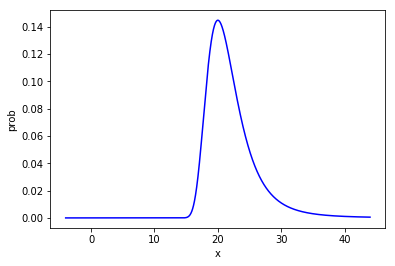

In [44]:
b.plot_pdf()

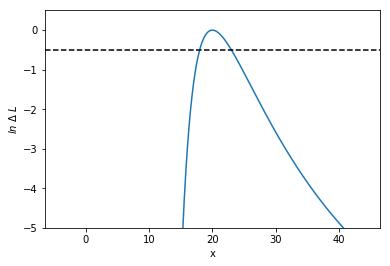

In [45]:
b.plot_log_likelihood()

You can generate random numbers using the object's PDF

In [46]:
b.generate_random()

array(20.02640264)

Distinct confidence intervals can be obtained, e.g. 90%:

In [49]:
b.get_confidence(90)

IndexError: index 0 is out of bounds for axis 0 with size 0

## Propagating confidence levels for complex functions

The function in which the errors will be propagated needs to have a very specific format, the AsymmetricMeasurment 
parameters need to be given as the first parameter as a (one) list, the other (float-like) parameters have to be the second parameter and be given as another list. The function need to return only one parameter. See an example:			

In [ ]:
def func(asymmetric_measurments , parameters ):
    as1, as2= asymmetric_measurments
    p1,p2 = parameters
    value = np.arctan(as1*p1) / (as2*p2)
    return value

The propagation is done with the Propagator() method, the first parameter is the function (func), the second and third are the list of asyme objects and the float-like parameters, respectively: 

In [ ]:
d = asyme.Propagator(func, [a,b], [3,5] )